<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1607]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import matplotlib.animation as animation
import numexpr as ne

In [1608]:
points_num = 4

In [1609]:
X = torch.zeros((points_num,points_num))

In [1610]:
for i in range(points_num):
    for j in range(i+1,points_num):
        tmp = random.randint(1,100)
        X[i][j] = tmp
        X[j][i] = tmp

In [1611]:
#X = torch.tensor([[0,5,0.5,2],[5,0,1,0.6],[0.5,1,0,2.5],[2,0.6,2.5,0]])

In [1612]:
data = pd.DataFrame(data=X)
data

,0,1,2,3
0,0.0,26.0,3.0,13.0
1,26.0,0.0,17.0,12.0
2,3.0,17.0,0.0,94.0
3,13.0,12.0,94.0,0.0


In [1613]:
counter = iter(range(1,len(data)))
steper = iter(torch.linspace(1,50,len(data)))
counter

In [1614]:
dots = []
plots = []
for i in range(len(data)):
    dots.append((f'x{i+1}',[0,0]))
dots

[('x1', [0, 0]), ('x2', [0, 0]), ('x3', [0, 0]), ('x4', [0, 0])]

In [1615]:
def draw_lines(x1: tuple, x2: tuple, distance: int):

    new_y = distance
    plots.append(plt.plot([x1[1][0], x1[1][0]], [x1[1][1], new_y], c='blue'))
    plots.append(plt.plot([x2[1][0], x2[1][0]], [x2[1][1], new_y], c='blue'))
    plots.append(plt.plot([x1[1][0], x2[1][0]], [new_y, new_y], c='blue'))

    newdot = (f'd{next(counter)}', (((x1[1][0] + x2[1][0]) / 2), new_y))

    plots.append(plt.scatter(x1[1][0], x1[1][1], marker='.', color='blue', s=50))
    plots.append(plt.scatter(x2[1][0], x2[1][1], marker='.', color='blue', s=50))
    plots.append(plt.scatter(newdot[1][0], newdot[1][1], marker='.', color='blue', s=50))

    plots.append(plt.text(x1[1][0], x1[1][1], x1[0]))
    plots.append(plt.text(x2[1][0], x2[1][1], x2[0]))
    plots.append(plt.text(newdot[1][0], newdot[1][1], newdot[0]))

    return newdot

In [1616]:
# find max
def step(matrix=X,func=torch.max, argfunc=torch.argmax):

    row, col = 0, 1
    for i in range(len(matrix)):
        for j in range(i+1, len(matrix)):
            if matrix[i,j] < matrix[row,col]:
                row,col = i,j

    x1 = dots[row]
    x2 = dots[col]

    if x1[1][0] == 0:
        x1[1][0] = next(steper)

    if x2[1][0] == 0:
        x2[1][0] = next(steper)

    distance = matrix[row,col]
    del dots[row]
    if col < row:
        del dots[col]
    else:
        del dots[col-1]
    newdot = draw_lines(x1, x2, distance)
    dots.append(newdot)


    #print(row,col)
    tmp = torch.cat((matrix[:,:row],matrix[:,row+1:]), dim=1)
    tmp = torch.cat((tmp[:,:col-1],tmp[:,col:]), dim=1)
    #print(tmp.shape)
    tmp = torch.cat((tmp[:row,:],tmp[row+1:,:]), dim=0)
    tmp = torch.cat((tmp[:col-1,:],tmp[col:,:]), dim=0)



    #print(tmp.shape)
    tmp1 = torch.cat((matrix[row,:torch.argmin(matrix[row,:])],matrix[row,torch.argmin(matrix[row,:])+1:]),dim=0)
    tmp1 = torch.cat((tmp1[:argfunc(tmp1)],tmp1[argfunc(tmp1)+1:]),dim=0)
    tmp2 = torch.cat((matrix[col,:torch.argmin(matrix[col,:])],matrix[col,torch.argmin(matrix[col,:])+1:]),dim=0)
    tmp2 = torch.cat((tmp2[:argfunc(tmp2)],tmp2[argfunc(tmp2)+1:]),dim=0)
    tmp3 = torch.stack((tmp1,tmp2),dim=0)
    #print(tmp3.shape)
    tmp4 = func(tmp3,dim=0)
    tmp4 = tmp4.values
    #print(tmp4.shape)
    matrix = torch.cat((tmp,tmp4.unsqueeze(dim=0)),dim=0)
    #print(matrix.shape)
    tmp4 = torch.cat((tmp4,torch.tensor([0])),dim=0)
    #print(tmp4.T.shape)
    matrix = torch.cat((matrix, tmp4.T.unsqueeze(dim=1)), dim=1)
    #print(matrix.shape)
    return matrix

In [1617]:
"""for i in range(points_num-1):
    X = step(matrix=X, func=torch.min, argfunc=torch.argmin)
    data = pd.DataFrame(data=X)
    print(data,end='\n\n\n||||||||||||||||||\n\n\n')"""

"for i in range(points_num-1):\n    X = step(matrix=X, func=torch.min, argfunc=torch.argmin)\n    data = pd.DataFrame(data=X)\n    print(data,end='\n\n\n||||||||||||||||||\n\n\n')"

          0         1         2
0  0.000000  0.038462  0.076923
1  0.038462  0.000000  0.058824
2  0.076923  0.058824  0.000000


||||||||||||||||||


          0         1
0  0.000000  0.058824
1  0.058824  0.000000


||||||||||||||||||


     0
0  0.0


||||||||||||||||||




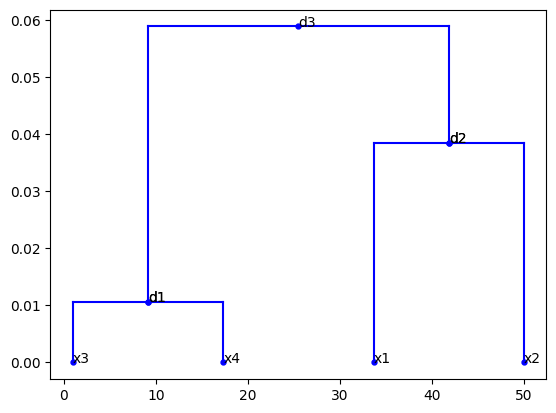

In [1618]:
for i in range(len(X)):
    for j in range(len(X[i])):
        if X[i][j] != 0:
            X[i][j] = 1 / X[i][j]

for i in range(points_num-1):
    X = step(matrix=X, func=torch.min, argfunc=torch.argmin)
    data = pd.DataFrame(data=X)
    print(data,end='\n\n\n||||||||||||||||||\n\n\n')